In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

%matplotlib inline


# menhhapus limit max column
pd.set_option('display.max_columns', None)

# Import Dataset

Dataset yang kita gunakan adalah "Used Car Auction Prices" yang berasal dari Kaggle

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
'''dfcar = pd.read_csv('car_prices.csv', on_bad_lines="skip")
dfcar.sample(5)'''

'dfcar = pd.read_csv(\'car_prices.csv\', on_bad_lines="skip")\ndfcar.sample(5)'

In [ ]:
# Biar ngga harus mounting
dfcar = pd.read_csv('https://drive.google.com/uc?id=1KfTnuIeppn-b5bdMyIvVVbII_P7m1Tnu', on_bad_lines='skip')
dfcar.sample(5)

year           make     model                trim   body transmission  \
152505  2012         Nissan    Maxima              3.5 SV  Sedan          NaN   
450738  2013           Ford  Explorer                 XLT    SUV    automatic   
543731  2013      Chevrolet     Cruze                 1LT  sedan    automatic   
137861  2014     Volkswagen    Passat              S PZEV  Sedan    automatic   
466426  2013  Mercedes-Benz   E-Class  E350 Sport BlueTEC  sedan    automatic   

                      vin state  condition  odometer   color interior  \
152505  1n4aa5ap4cc810699    fl        3.9   14012.0  silver     gray   
450738  1fm5k8d84dga94553    mn        3.5   50125.0   black     gray   
543731  1g1pc5sb7d7291118    ca        3.3   44660.0    blue    black   
137861  1vwap7a35ec003593    pa        3.9   35425.0    gray    black   
466426  wddhf2eb2da638067    nj        1.0    8430.0   black      tan   

                                seller    mmr  sellingprice  \
152505              nissan-infiniti lt  19600         19400   
450738                     select lane  23100         22900   
543731           the hertz corporation  10050          9900   
137861  enterprise veh exchange/rental  12050         12000   
466426              manheim new jersey  30400         17500   

                                       saledate  
152505  Tue Jan 20 2015 01:30:00 GMT-0800 (PST)  
450738  Thu May 21 2015 03:30:00 GMT-0700 (PDT)  
543731  Wed Jun 17 2015 05:30:00 GMT-0700 (PDT)  
137861  Fri Jan 16 2015 01:00:00 GMT-0800 (PST)  
466426  Wed Jun 03 2015 05:00:00 GMT-0700 (PDT)

### List fitur pada dataset adalah sebagai berikut :

1. Year : Tanggal produksi dari mobil.
2. Make : Merk dari mobil.
3. Model : Edisi dari tiap merk mobil.
4. Trim : Versi trim dari mobil.
5. Body : Tipe bentuk dari mobil.
6. Transmission : Transmisi yang digunakan pada mobil.
7. VIN : Vehicle Identification Number.
8. State : Negara bagian tempat mobil dijual.
9. Condition : Kondisi dari mobil pada saat dijual.
10. Odometer : Jarak tempuh mobil semenjak tanggal manufacture.
11. Color : Warna eksterior dari mobil.
12. Interior : Warna interior dari mobil.
13. Seller : Penjual dari mobil (Car dealers).
14. MMR : Manhiem Market Record, market yang memprediksi harga mobil.
15. Sellingprice : Nilai jual mobil.
16. Saledate : Tanggal mobil dijual.

# Data Exploration

In [ ]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


1. Total dari data ada 558811 entry
2. Tipe dari data int, float dan object, dan terlihat sudah sesuai dengan kolomnya
3. Terdapat nilai Null pada beberapa fitur

In [ ]:
dfcar.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Terdapat 9 fitur yang memiliki data Null, dan jumlahnya terhitung banyak terutama di fitur transmission. Perlu diadakan tindak lanjut di Data Cleaning

In [ ]:
dfcar.duplicated().sum()

0

Dataset tidak memiliki data duplikat sehingga tidak diperlukan penanganan.

In [ ]:
# Mengkategorikan fitur sesuai dari tipe data
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Membatasi angka setelah koma hingga hanya 3 angka
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
dfcar[num].describe()

year  condition   odometer        mmr  sellingprice
count 558811.000 547017.000 558717.000 558811.000    558811.000
mean    2010.039      3.425  68323.196  13769.325     13611.262
std        3.967      0.949  53397.753   9679.875      9749.657
min     1982.000      1.000      1.000     25.000         1.000
25%     2007.000      2.700  28374.000   7100.000      6900.000
50%     2012.000      3.600  52256.000  12250.000     12100.000
75%     2013.000      4.200  99112.000  18300.000     18200.000
max     2015.000      5.000 999999.000 182000.000    230000.000

1. Condition hanya memiliki value antara 1-5.
2. Value dari odometer terlihat memiliki jarak yang jauh antara min dan max.
3. MMR dan sellingprice memiliki nilai yang hampir mirip.

In [ ]:
dfcar[cat].describe()

make   model    trim    body transmission                vin  \
count   548510  548412  548160  545616       493458             558811   
unique      96     973    1975      86            2             550296   
top       Ford  Altima    Base   Sedan    automatic  wbanv13588cz57827   
freq     93554   19349   55817  199437       475914                  5   

         state   color interior              seller  \
count   558811  558062   558062              558811   
unique      38      20       17               14264   
top         fl   black    black  nissan-infiniti lt   
freq     82945  110970   244325               19693   

                                       saledate  
count                                    558811  
unique                                     3745  
top     Tue Feb 10 2015 01:30:00 GMT-0800 (PST)  
freq                                       5334

1. Ford merupakan brand yang paling populer diantara 96 total brand lain.
2. Selain itu, mobil tipe sedan juga termasuk yang paling favorit.
3. Transmisi automatic lebih dicari customer dibanding manual dengan jumlah lebih dari 90%
4. Warna hitam tetap mendominasi baik di eksterior maupun interior.

# **UNIVARIATE ANALYSIS**

**Outlier Numerik (year, condition, odometer, MMR, sellingprice)**

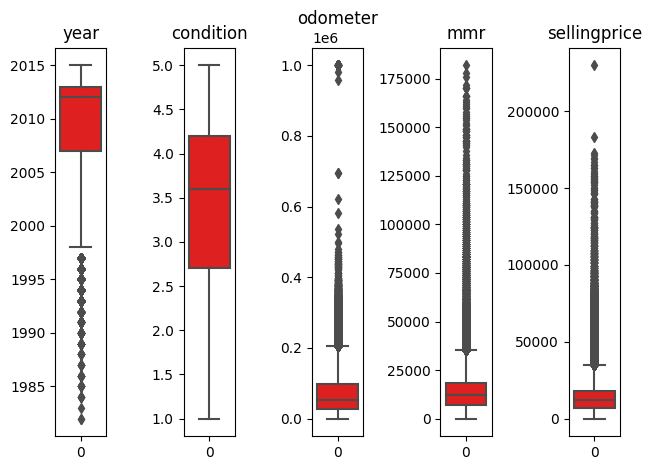

In [ ]:
#melihat penampilan outlier
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Dapat dilihat bahwa mmr dan selling price memiliki outlier paling banyak. untuk boxplot terlihat range mmr dan selling price tergolong jauh cukup jauh. namun untuk kuartil dan mediannya berada sangat timpang. hal ini dapat terjadi karena nilai mmr dan selling price merupakan harga yang dapat bernilai luas sesuai spesifikasi mobil bekasnya.

**Distribusi (year, condition, odometer, MMR, sellingprice)**

<Figure size 700x300 with 0 Axes>

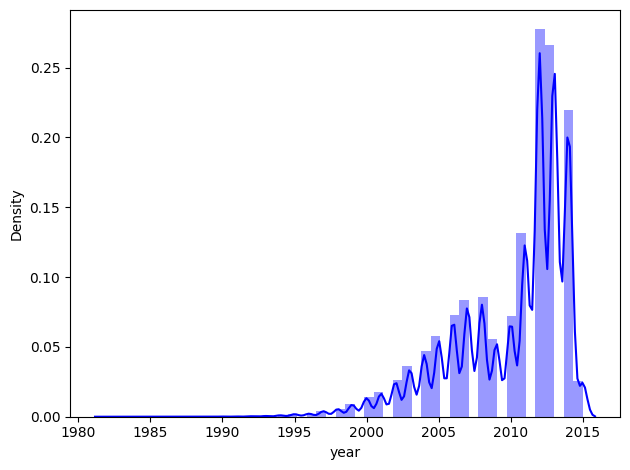

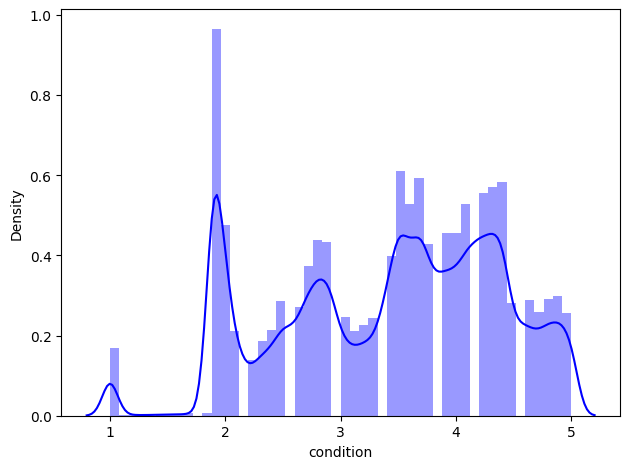

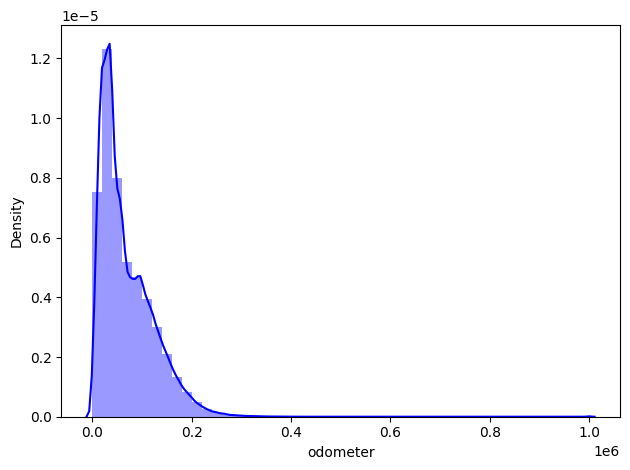

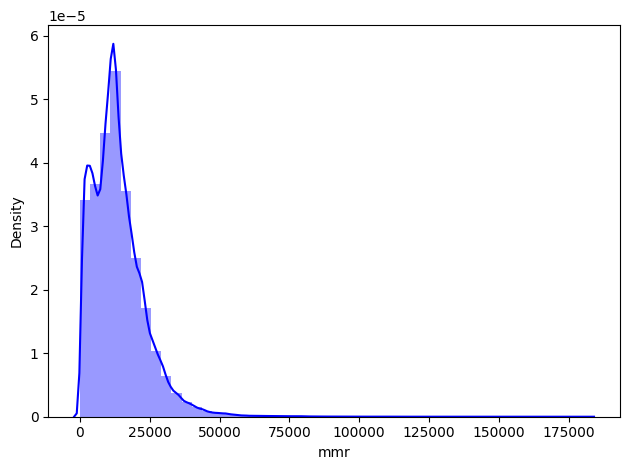

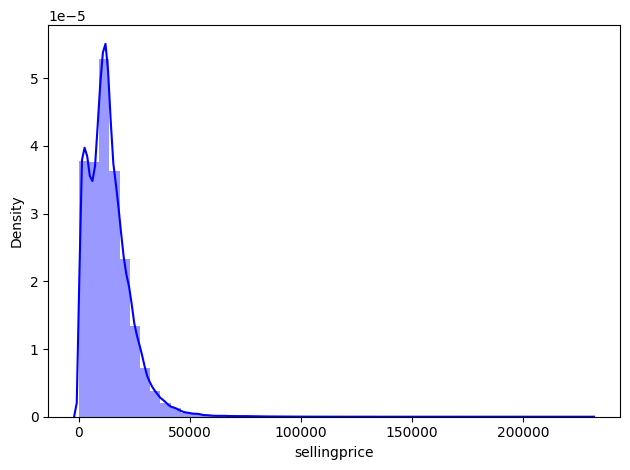

In [ ]:
#melihat grafik distribusi
plt.figure(figsize=(7, 3))
for i in range(0, len(num)):
    plt.figure()
    sns.distplot(dfcar[num[i]], color='blue')
    plt.tight_layout()

Dari grafik diatas dapat terlihat :
1. Untuk tahun penjualannya, cenderung mengalami peningkatan pada setiap tahunnya. dan puncak penjualannya berada di antara tahun 2010 hingga 2015
2. Untuk grafik kondisi, cenderung di angka kondisi 2 hingga 5. Dan dapat terlihat untuk mayoritas berada pada kondisi 2 dan paling sedikit berada pada kondisi 1
3. Untuk odometer dapat terlihat bahwa mayoritas berada di angka 0 hingga 0.2. Artinya jarak tempuh mobil tersebut masih pendek. Dan bisa disimpulkan bahwa mayoritas mobil yang dijual masih tergolong pemakaian jangka pendek
4. Untuk grafik MMR, terlihat bahwa grafik tersebut memiliki distribusi positif skew. Mayoritas nilai MMR terdistribusi di angka 0 - 50000
5. Untuk grafik selling price sama seperti MMR, terlihat juga bahwa memiliki grafik positif skew. Mayoritas nilai selling price terdistribusi di angka 0 - 60000

**Transmission**

In [ ]:
#mengelompokan berdasarkan transmission
kel_trans = dfcar.groupby('transmission').size().reset_index(name='count')
kel_trans

transmission   count
0    automatic  475914
1       manual   17544

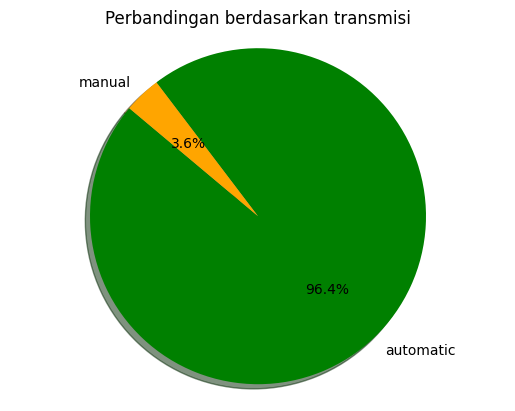

In [ ]:
#visualisasi berdasarkan transmisi
plt.pie(kel_trans['count'], labels=kel_trans['transmission'],
        autopct='%1.1f%%',
        colors=['green', 'orange'],
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Perbandingan berdasarkan transmisi')
plt.show()

Dapat dilihat bahwa mayoritas mobil yang dijual menggunakan transmisi automatic

**Make**

In [ ]:
#mengelompokan berdasarkan brand
top_merek = dfcar.groupby('make').size().sort_values(ascending= False).reset_index(name='count')
top_merek

make  count
0         Ford  93554
1    Chevrolet  60197
2       Nissan  53946
3       Toyota  39871
4        Dodge  30710
..         ...    ...
91  chev truck      1
92     ford tk      1
93   airstream      1
94  hyundai tk      1
95    mazda tk      1

[96 rows x 2 columns]

In [ ]:
#top 10 merek brand
top10 = top_merek.head(10)
top10

make  count
0       Ford  93554
1  Chevrolet  60197
2     Nissan  53946
3     Toyota  39871
4      Dodge  30710
5      Honda  27206
6    Hyundai  21816
7        BMW  20719
8        Kia  18077
9   Chrysler  17276

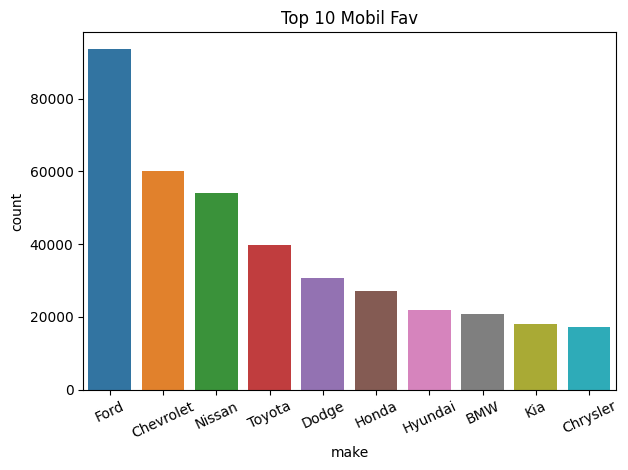

In [ ]:
#visualisasi top brand
plt.figure()
sns.barplot(data = top10, x= 'make', y= 'count')
plt.title('Top 10 Mobil Fav')
plt.xticks(rotation= 25)
plt.tight_layout()

Terlihat bahwa merek mobil paling fav adalah ford, lalu selanjutnya disusul oleh merek chevrolet

**Model**

In [ ]:
#mengelompokan berdasarkan model
top_model = dfcar.groupby('model').size().sort_values(ascending= False).reset_index(name='count')
top_model

model  count
0     Altima  19349
1      F-150  14479
2     Fusion  12946
3      Camry  12545
4     Escape  11861
..       ...    ...
968    Paseo      1
969       Q3      1
970  Ram Van      1
971  Regency      1
972        1      1

[973 rows x 2 columns]

In [ ]:
#top 20 model mobil
top20_model = top_model.head(20)
top20_model

model  count
0           Altima  19349
1            F-150  14479
2           Fusion  12946
3            Camry  12545
4           Escape  11861
5            Focus  10394
6           Accord   9127
7         3 Series   8204
8    Grand Caravan   7941
9           Impala   7923
10        Explorer   7707
11           Civic   7433
12         G Sedan   7417
13         Corolla   7354
14          Malibu   7028
15          Sonata   6914
16          Maxima   6611
17  Silverado 1500   6362
18           Cruze   6348
19         Elantra   6262

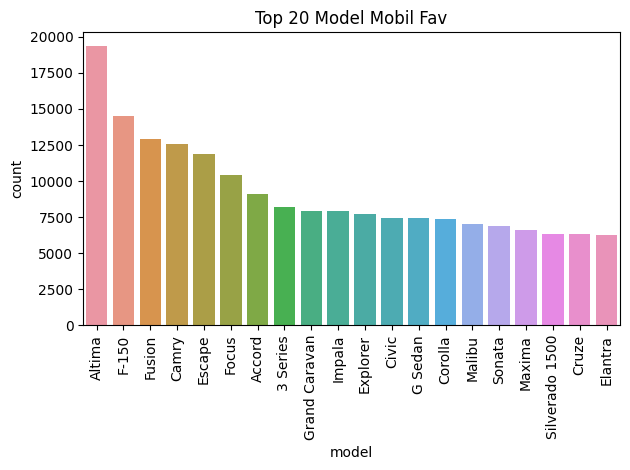

In [ ]:
#visualisasi top model
plt.figure()
sns.barplot(data = top20_model, x= 'model', y= 'count')
plt.title('Top 20 Model Mobil Fav')
plt.xticks(rotation= 90)
plt.tight_layout()

Terlihat bahwa top model mobil bekas adalah altima, dan top 2 adalah f-150

**Color, Interior**

In [ ]:
#mengelompokan berdasarkan warna mobil dan warna interior
color = dfcar.groupby('color').size().sort_values(ascending= False).reset_index(name= 'count')
interior = dfcar.groupby('interior').size().sort_values(ascending= False).reset_index(name= 'count')

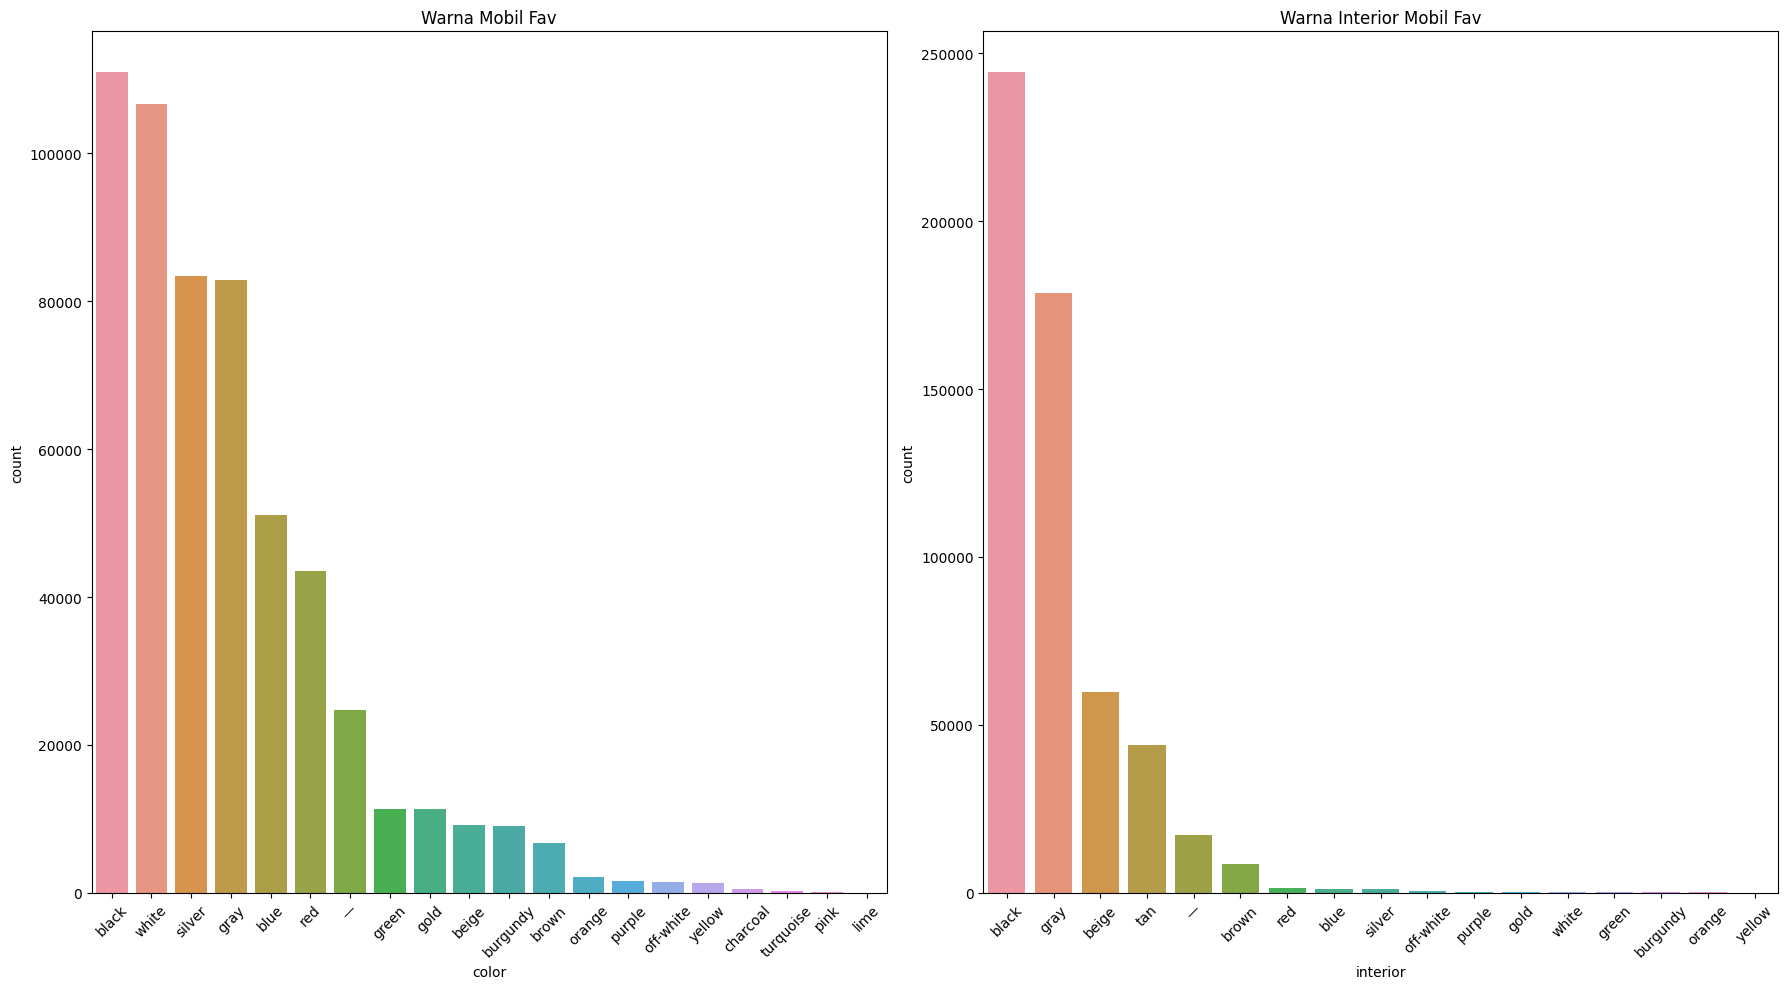

In [ ]:
#visualisasi
plt.figure(figsize= (18, 10))

plt.subplot(1,2,1)
sns.barplot(data=color, x='color', y='count')
plt.title('Warna Mobil Fav')
plt.xticks(rotation= 45)

plt.subplot(1,2,2)
sns.barplot(data=interior, x='interior', y='count')
plt.title('Warna Interior Mobil Fav')
plt.xticks(rotation= 45)
plt.tight_layout()

Dapat terlihat bahwa :
1. Untuk warna mobil dan warna interior mobil paling fav adalah warna hitam
2. Untuk warna mobil putih juga sama banyak dengan warna hitam, beda tipis
3. Warna mobil silver dan gray memiliki jumlah yg setara
4. Warna interior gray juga menjadi fav kedua setelah warna interior hitam

**Trim**

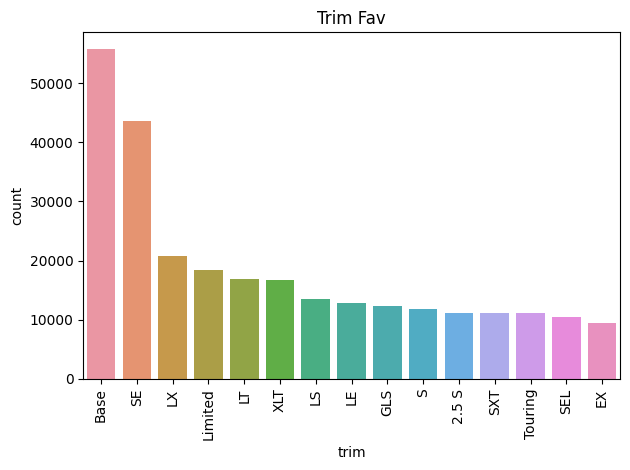

In [ ]:
#mengelompokan berdasarkan versi trim mobil
trim = dfcar.groupby('trim').size().sort_values(ascending= False).reset_index(name= 'count').head(15)

#visualisasi
plt.figure()
sns.barplot(data =trim, x='trim', y='count')
plt.title('Trim Fav')
plt.xticks(rotation= 90)
plt.tight_layout()

Terlihat bahwa versi trim mobil terbanyak adalah base, dan versi trim top 2 adalah SE. Untuk versi trim lainnya cenderung memiliki perbedaan yg tdk signifikan (hampir sama)

**State**

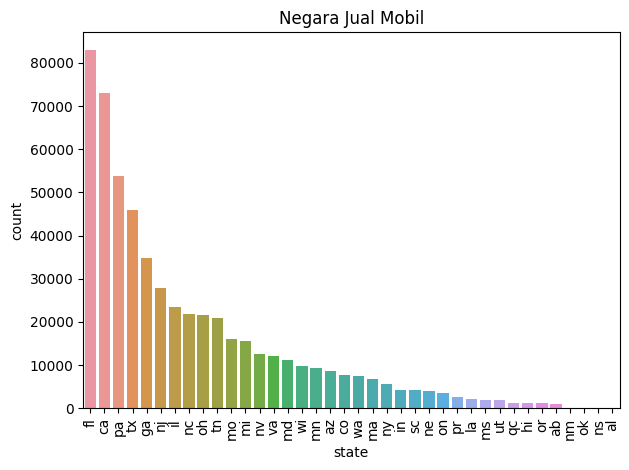

In [ ]:
#mengelompokan berdasarkan negara tempat menjual mobil
country = dfcar.groupby('state').size().sort_values(ascending= False).reset_index(name= 'count')

#visualisasi
plt.figure()
sns.barplot(data=country, x='state', y='count')
plt.title('Negara Jual Mobil')
plt.xticks(rotation= 90)
plt.tight_layout()

**Seller**

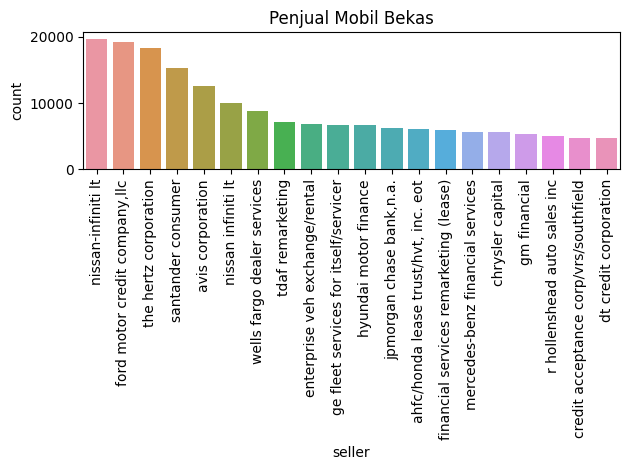

In [ ]:
#mengelompokan berdasarkan penjual
seller = dfcar.groupby('seller').size().sort_values(ascending= False).reset_index(name= 'count').head(20)

#visualisasi
plt.figure()
sns.barplot(data=seller, x='seller', y='count')
plt.title('Penjual Mobil Bekas')
plt.xticks(rotation= 90)
plt.tight_layout()

**Sale Date**

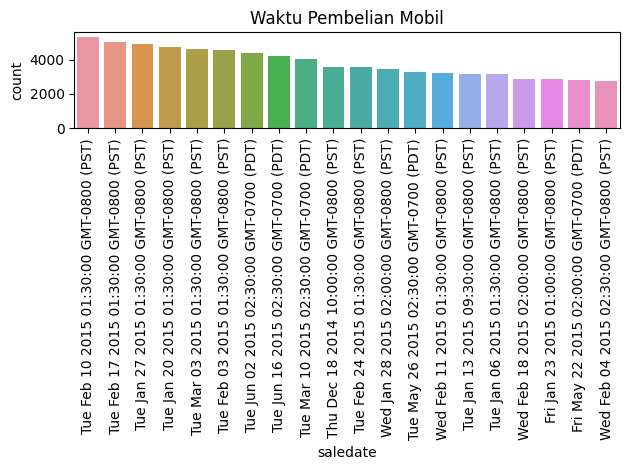

In [ ]:
#mengelompokan berdasarkan penjual
sale_date = dfcar.groupby('saledate').size().sort_values(ascending= False).reset_index(name= 'count').head(20)

#visualisasi
plt.figure()
sns.barplot(data=sale_date, x='saledate', y='count')
plt.title('Waktu Pembelian Mobil')
plt.xticks(rotation= 90)
plt.tight_layout()

In [ ]:
timeget = []
for i in dfcar['saledate'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)

In [ ]:
dfcar['datetime'] =  pd.to_datetime(timeget)

In [ ]:
dfcar['hour'] = dfcar['datetime'].apply(lambda time: time.strftime('%H:%M:%S'))
dfcar['month'] = dfcar['datetime'].apply(lambda time: time.month)
dfcar['day of week'] = dfcar['datetime'].apply(lambda time: time.dayofweek)

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
dfcar['day of week'] = dfcar['day of week'].map(dmap)

In [ ]:
dfcar.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca      5.000 16639.000  white    black   
1  5xyktca69fg561319    ca      5.000  9393.000  white    beige   
2  wba3c1c51ek116351    ca      4.500  1331.000   gray    black   
3  yv1612tb4f1310987    ca      4.100 14282.000  white    black   
4  wba6b2c57ed129731    ca      4.300  2641.000   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services remarketing (lease)  31900         30000   
3                 volvo na rep/world omni  27500         27750   
4  financial services remarketing (lease)  66000         67000   

                                  saledate            datetime      hour  \
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST) 2014-12-16 12:30:00  12:30:00   
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST) 2014-12-16 12:30:00  12:30:00   
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST) 2015-01-15 04:30:00  04:30:00   
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST) 2015-01-29 04:30:00  04:30:00   
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST) 2014-12-18 12:30:00  12:30:00   

   month day of week  
0     12         Tue  
1     12         Tue  
2      1         Thu  
3      1         Thu  
4     12         Thu

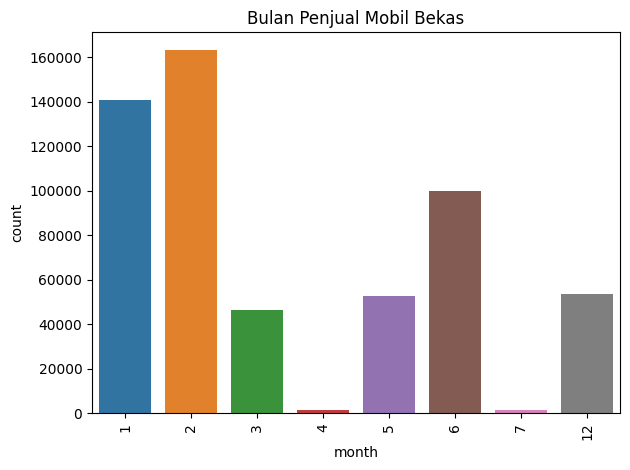

In [ ]:
#mengelompokan berdasarkan bulan pembelian
month = dfcar.groupby('month').size().sort_values(ascending= False).reset_index(name= 'count')

#visualisasi
plt.figure()
sns.barplot(data=month, x='month', y='count')
plt.title('Bulan Penjual Mobil Bekas')
plt.xticks(rotation= 90)
plt.tight_layout()

Dapat terlihat bahwa pembelian mobil cenderung terjadi di akhir tahun hingga awal tahun. SelaHal tersebut bisa memunculkan hipotesis karena akhir tahun hingga awal tahun, banyak pekerja yang menerima THR dan bonus akhir tahun.

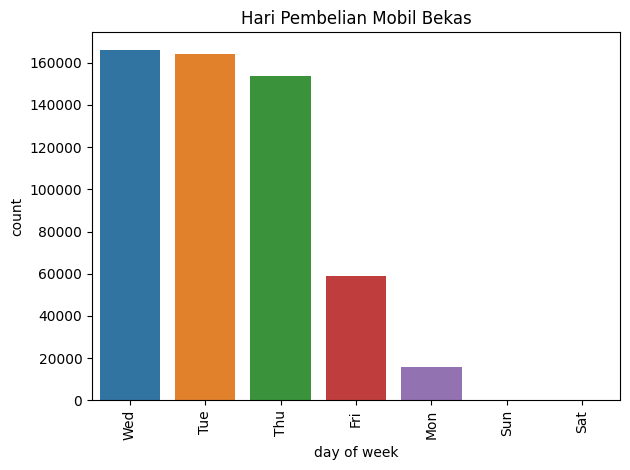

In [ ]:
#mengelompokan berdasarkan hari pembelian
day = dfcar.groupby('day of week').size().sort_values(ascending= False).reset_index(name= 'count')

#visualisasi
plt.figure()
sns.barplot(data=day, x='day of week', y='count')
plt.title('Hari Pembelian Mobil Bekas')
plt.xticks(rotation= 90)
plt.tight_layout()

Dapat dilihat bahwa pembelian mobil terjadi pada top hari yaitu hari selasa, rabu, dan kamis. Dengan pembelian terbanyak terjadi pada hari selasa

# **MULTIVARIATE ANALYSIS**

In [ ]:
dfcar.corr()

year  condition  odometer    mmr  sellingprice  month
year          1.000      0.551    -0.773  0.597         0.586 -0.047
condition     0.551      1.000    -0.539  0.485         0.539 -0.014
odometer     -0.773     -0.539     1.000 -0.588        -0.582  0.041
mmr           0.597      0.485    -0.588  1.000         0.984 -0.025
sellingprice  0.586      0.539    -0.582  0.984         1.000 -0.029
month        -0.047     -0.014     0.041 -0.025        -0.029  1.000

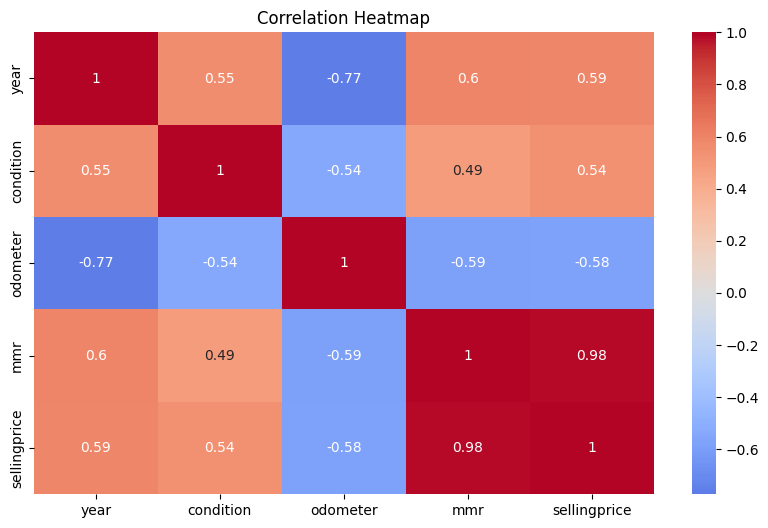

In [ ]:
# Pilih hanya kolom numerik untuk korelasi
corr_matrix = dfcar[num].corr()

# Plot korelasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. Korelasi antara 'year' dan 'sellingprice' adalah positif, menunjukkan bahwa semakin baru mobil, semakin tinggi harga jualnya.

2. 'condition' memiliki korelasi positif dengan 'sellingprice', yang berarti semakin baik kondisi mobil, semakin tinggi harga jualnya.

3. 'odometer' memiliki korelasi negatif dengan 'sellingprice', menunjukkan bahwa semakin sedikit jarak tempuh, semakin tinggi harga jualnya.

4. 'mmr' memiliki korelasi positif yang cukup kuat dengan 'sellingprice', menunjukkan bahwa harga jual yang diprediksi oleh MMR memiliki korelasi yang baik dengan harga jual aktual.

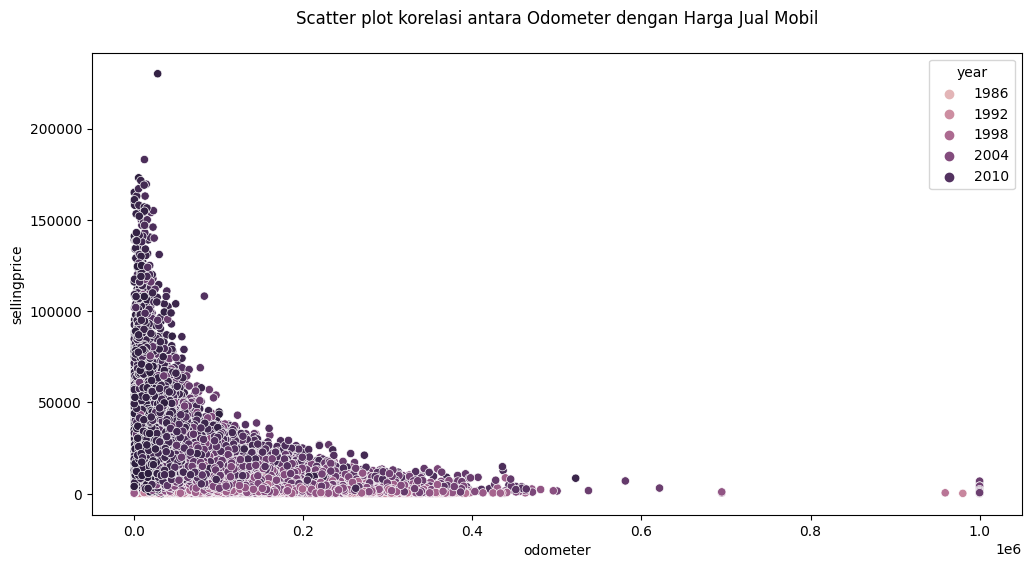

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=dfcar, x='odometer', y='sellingprice', hue='year')
plt.title('Scatter plot korelasi antara Odometer dengan Harga Jual Mobil\n')
plt.show()

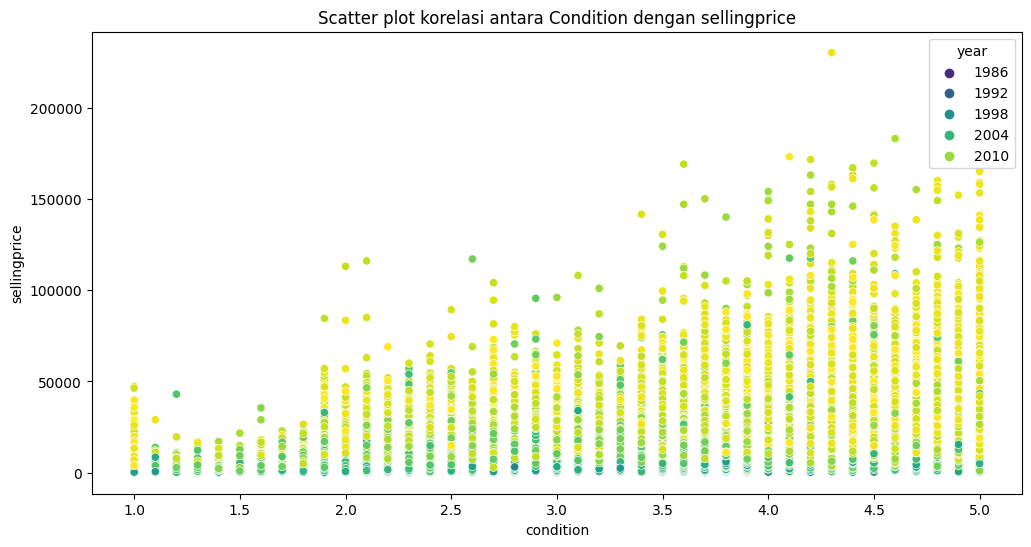

In [ ]:
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=dfcar, x='condition', y='sellingprice', hue='year', palette='viridis')
plt.title('Scatter plot korelasi antara Condition dengan sellingprice')
plt.show()

# **INSIGHT AND VISUALIZATION**

## Pembuatan beberapa kolom baru

In [ ]:
# Pembuatan beberapa kolom yang berkaitan dengan waktu:
## Kolom 'hour_only'
dfcar['hour_only'] = dfcar['datetime'].dt.hour

# Membuat kolom 'month_year'
dfcar['month_year'] = dfcar.datetime.dt.strftime('%b-%y')

## Membuat kolom 'date'
dfcar['date'] = dfcar['datetime'].dt.date
dfcar['date'] = pd.to_datetime(dfcar['date'], format = '%Y-%m-%d')

In [ ]:
# Kolom ''body_simplified'
dfcar['body_simplified'] = dfcar['body'].str.upper()

def body_category(x):
    if 'SUV' in str(x):
        return 'SUV'
    elif 'SEDAN' in str(x):
        return 'Sedan'
    elif 'CONVERTIBLE' in str(x):
         return 'Convertible'
    elif 'COUPE' in str(x):
        return 'Coupe'
    elif 'KOUP' in str(x):
        return 'Coupe'
    elif 'WAGON' in str(x):
        return 'Wagon'
    elif 'HATCHBACK' in str(x):
        return 'Hatchback'
    elif 'CAB' in str(x):
        return 'CAB'
    elif 'SUPERCREW' in str(x):
        return 'CAB'
    elif 'VAN' in str(x):
        return 'VAN'
    else:
        return 'N/A'

dfcar['body_simplified'] = dfcar.apply(lambda x: body_category(x.body_simplified), axis=1)

In [ ]:
# Kolom 'is_sold_below_mmr'
## kolom yang berisi apakah mobil terjual dibawah MMR atau tudak (1=Ya, 0=Tidak)
dfcar['is_sold_below_mmr'] = dfcar.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

In [ ]:
# Kolom 'mmr_category'

## Kriteria yang dipakai (dapat melakukan call mmr_range):
odometer_condition = pd.DataFrame({'category':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                   'condition':['<10k', '10k<n<20k', '20k<n<30k', '30k<n<40k', '40k<n<60k', '60k<n<100k', '100k<n<150k', '150k<n<250k', '250k<n<400k', '>400k']})

## membuat rumus odometer_category:
def odometer_category(indicator):
    if indicator <= 10000:
        return 1
    elif indicator <= 20000:
        return 2
    elif indicator <= 30000:
        return 3
    elif indicator <= 40000:
        return 4
    elif indicator <= 60000:
        return 5
    elif indicator <= 100000:
        return 6
    elif indicator <= 150000:
        return 7
    elif indicator <= 250000:
        return 8
    elif indicator <= 400000:
        return 9
    elif indicator > 400000:
        return 10
    else:
        return 'uncategorized'

dfcar['odometer_category'] = dfcar.apply(lambda x: odometer_category(x.odometer), axis=1)

In [ ]:
dfcar.head(2)

year make    model trim body transmission                vin state  \
0  2015  Kia  Sorento   LX  SUV    automatic  5xyktca69fg566472    ca   
1  2015  Kia  Sorento   LX  SUV    automatic  5xyktca69fg561319    ca   

   condition  odometer  color interior                   seller    mmr  \
0      5.000 16639.000  white    black  kia motors america, inc  20500   
1      5.000  9393.000  white    beige  kia motors america, inc  20800   

   sellingprice                                 saledate            datetime  \
0         21500  Tue Dec 16 2014 12:30:00 GMT-0800 (PST) 2014-12-16 12:30:00   
1         21500  Tue Dec 16 2014 12:30:00 GMT-0800 (PST) 2014-12-16 12:30:00   

       hour  month day of week  hour_only month_year       date  \
0  12:30:00     12         Tue         12     Dec-14 2014-12-16   
1  12:30:00     12         Tue         12     Dec-14 2014-12-16   

  body_simplified  is_sold_below_mmr odometer_category  
0             SUV                  0                 2  
1             SUV                  0                 1

## Persentase Penjualan

In [ ]:
transaction = dfcar.groupby('is_sold_below_mmr').agg({'vin':'count'}).rename({'vin':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

total_transaction  percentage
is_sold_below_mmr                               
0                             272386      48.740
1                             286425      51.260

In [ ]:
transaction.reset_index(inplace=True)
persentase_bawah_mmr = transaction[transaction['is_sold_below_mmr']==1].percentage
print(f'\nPersentase penjualan dibawah MMR sebesar: {persentase_bawah_mmr[1]}%\n')


Persentase penjualan dibawah MMR sebesar: 51.26%



## Rata-Rata MMR dan Sales

### Bulanan

In [ ]:
# Melakukan grouping berdasarkan kolom 'month_year'
monthly_sale_summary = dfcar.groupby(['month_year']).agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
monthly_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']
# Sorting Date secara manual
custom_dict = {'Jan-14':0, 'Feb-14':1, 'Dec-14':2, 'Jan-15':3, 'Feb-15':4, 'Mar-15':5, 'Apr-15':6, 'May-15':7, 'Jun-15':8, 'Jul-15':9}
monthly_sale_summary = monthly_sale_summary.sort_values(by=['date'], key=lambda x: x.map(custom_dict))

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_sale_summary.date,
    y=monthly_sale_summary.mmr_avg,
    name='MMR'
))

fig.add_trace(go.Scatter(
    x=monthly_sale_summary.date,
    y=monthly_sale_summary.selling_avg,
    name='Sales'
))



annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Rata-Rata MMR dan Sales Bulanan',
                              font=dict(family='Arial',
                                        size=30),
                              showarrow=False))


fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    paper_bgcolor="LightYellow",
    annotations=annotations
)

# Set axis title
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show()

Jumlah rata – rata sales di setiap bulannya selalu lebih rendah daripada nilai MMR-nya

### Harian

In [ ]:
# Melakukan grouping berdasarkan kolom 'date'
daily_sale_summary = dfcar.groupby('date').agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
daily_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']

In [ ]:
dt_breaks = pd.date_range(start='2014-02-15', end='2014-12-15', freq='D')

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=daily_sale_summary.date,
    y=daily_sale_summary.mmr_avg,
    name='MMR'
))

fig.add_trace(go.Scatter(
    x=daily_sale_summary.date,
    y=daily_sale_summary.selling_avg,
    name='Sales'
))



annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Rata-Rata MMR dan Sales Harian',
                              font=dict(family='Arial',
                                        size=30),
                              showarrow=False))


fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    paper_bgcolor="LightYellow",
    annotations=annotations
)

# Set axis title
fig.update_xaxes(title_text="Date", rangebreaks=[dict(values=dt_breaks)], tickformat = '%b-%Y', dtick='M1')
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show()

Dari plot harian ini lebih dapat terlihat bahwa terdapat beberapa titik dimana penjualan mobil sama atau bahkan lebih tinggi dari pada MMR dibanding bila dilihat dari plot bulanan.

## Jumlah Transaksi

### Bulanan

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_sale_summary.date,
    y=monthly_sale_summary.total_transaction,
    name='MMR'
))



annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Jumlah Transaksi Bulanan',
                              font=dict(family='Arial',
                                        size=30),
                              showarrow=False))


fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    paper_bgcolor="LightYellow",
    annotations=annotations
)

# Set axis title
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Rata-Rata MMR, Sales")

fig.show()

Puncak transaksi terjadi pada Feb-2015 (Sekitar 160rb Transaksi), setelahnya terjadi penurunan transaksi hingga Apr-2015 dan Kembali naik hingga Jun-2015


### Heatmap Jumlah Transaksi Berdasarkan Hari dan Jam

In [ ]:
week_hour = dfcar.pivot_table(index='day of week',columns='hour_only',values='vin',aggfunc='count')
week_hour = week_hour.reindex(index=['Mon','Tue', 'Wed','Thu', 'Fri', 'Sat', 'Sun'])
week_hour = week_hour.fillna(0)

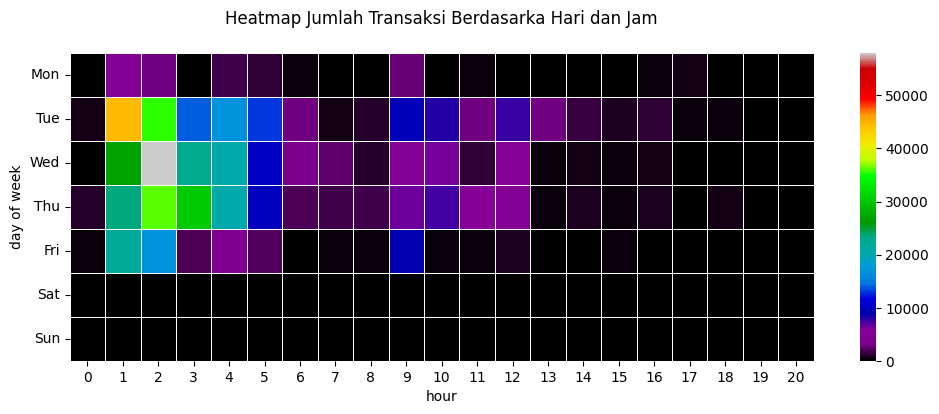

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(week_hour, cmap='nipy_spectral', annot=False, fmt="2f", linewidths=.5, ax=ax)
plt.title('Heatmap Jumlah Transaksi Berdasarka Hari dan Jam\n')
plt.xlabel('hour')
plt.yticks(rotation=0)
plt.show()

Dari plot diatas, diperoleh informasi bahwa:
- Transaksi lebih banyak dilakukan pada saat Weekdays
- Transaksi tergolong tinggi pada jam 1 – 6 dan 9 – 12
- Peak Transaksi terjadi pada saat jam 1 - 3


### Penjualan Mobil dibawah MMR Berdasarkan Kategori Odometer

In [ ]:
# Melakukan Grouping
body_odometer_mmr = dfcar.groupby(['body_simplified', 'odometer_category', 'is_sold_below_mmr']).agg({'vin' : 'count'}).rename({'vin' : 'count'}, axis=1)
body_odometer_mmr['percentage'] = round((body_odometer_mmr/(body_odometer_mmr.groupby(level=(0,1)).sum())*100), 2)
body_odometer_mmr.reset_index(inplace=True)

# Filtering untuk penjualan dibawah MMR
body_odometer_mmr = body_odometer_mmr[body_odometer_mmr['is_sold_below_mmr']==1].sort_values((['body_simplified', 'odometer_category']), ascending=True).reset_index(drop='index')

In [ ]:
fig = go.Figure()


for i in range(0,(body_odometer_mmr.body_simplified.nunique())):
    fig.add_trace(go.Scatter(
        x=body_odometer_mmr[body_odometer_mmr.body_simplified == body_odometer_mmr.body_simplified.unique()[i]].odometer_category,
        y=body_odometer_mmr[body_odometer_mmr.body_simplified == body_odometer_mmr.body_simplified.unique()[i]].percentage,
        name=(body_odometer_mmr.body_simplified.unique()[i])
    ))



annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Persentase penjualan mobil dibawah MMR berdasarkan ketegori Odometer',
                              font=dict(family='Arial',
                                        size=24),
                              showarrow=False))


fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    paper_bgcolor="LightYellow",
    annotations=annotations
)

# Set axis title
fig.update_xaxes(title_text="Kategori Odometer")
fig.update_yaxes(title_text="Persentase Penjualan Dibawah MMR")

fig.show()

Terlihat bahwa secara umum, odometer tidak berpengaruh terhadap kemungkinan apakah suatu mobil akan terjual dibawah nilai MMR atau tidak

## Jumlah Penjualan Terbanyak berdasarkan Jenis Body Mobil

In [ ]:
fig = px.histogram(dfcar, y='body_simplified',
                   color='body_simplified',
                   labels={'body_simplified': 'Body'},
                   title='Jumlah Penjualan Terbanyak Berdasarkan Body',
                   width=1000,
                   height=400
                  ).update_yaxes(categoryorder='total ascending')
fig.update_layout(paper_bgcolor='LightYellow')
fig.show()

Jumlah penjualan mobil dengan tipe body sedan dan SUV Memiliki Penjualan yang Jauh melampaui Tipe body lainnya, terdapat variabel N/A yang merupakan variabel kosong (N.A) pada database

## Hubungan antara Odometer dengan Harga Jual Mobil

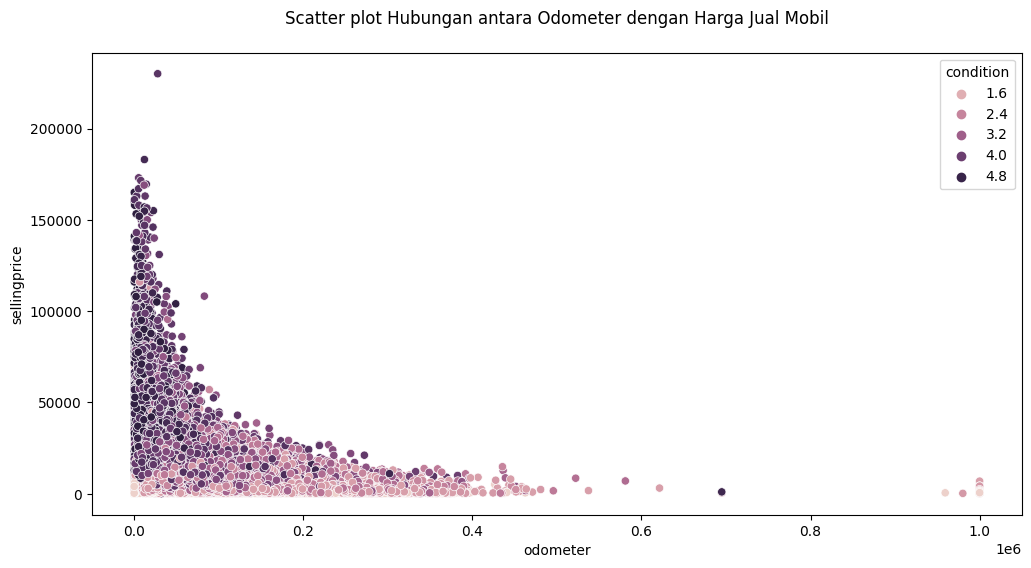

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=dfcar, x='odometer', y='sellingprice', hue='condition')
plt.title('Scatter plot Hubungan antara Odometer dengan Harga Jual Mobil\n')
plt.show()

Dapat terlihat bahwa harga jual mobil dipengaruhi oleh kondisi mobil yang baik (ditunjukkan oleh angka 3 ke atas) dengan nilai odometer yang kecil (hingga rentang 20k). Namun, kita juga bisa melihat ternyata masih terhitung banyak kondisi mobil yang dikatakan kurang baik.

## Model Mobil dengan penjualan dibawah MMR yang Cukup Tinggi

beberapa kriteria yang dipakai (salah satu) diantaranya:
- Persentase penjualan dibawah MMR >= 60% dan Jumlah unit dibawah MMR >= 15
- Persentase penjualan dibawah MMR >= 75% dan Jumlah unit dibawah MMR >= 6

In [ ]:
# Melakukan Grouping model
model_mmr = dfcar.groupby(['model', 'make', 'is_sold_below_mmr']).agg({'vin' : 'count'}).rename({'vin' : 'total_sold'}, axis=1)
model_mmr['percentage'] = round((model_mmr/(model_mmr.groupby(level=0).sum())*100), 2)
model_mmr.reset_index(inplace=True)

In [ ]:
# Filtering berdasarkan kriteria
unrecomended_model = model_mmr[((model_mmr['is_sold_below_mmr']==1) & (model_mmr['percentage']> 60) & (model_mmr['total_sold']>=15)) |
                               ((model_mmr['is_sold_below_mmr']==1) & (model_mmr['percentage']> 75) & (model_mmr['total_sold']>=6))].sort_values('total_sold', ascending=False)
unrecomended_model.reset_index(drop='index', inplace=True)
unrecomended_model.head(5)

model       make  is_sold_below_mmr  total_sold  percentage
0     Grand Am    Pontiac                  1         276      63.300
1  Monte Carlo  Chevrolet                  1         241      60.550
2       Blazer  Chevrolet                  1         213      64.740
3     S-Series     Saturn                  1         212      60.570
4     Freestar       Ford                  1         158      60.310

In [ ]:
print(f'\nJumlah Model: {unrecomended_model.model.nunique()}\n\n')


Jumlah Model: 67




**Berikut List Model Mobil Beserta Merk yang memiliki penjualan dibawah MMR yang Cukup Tinggi:**

In [ ]:
unrecomended_model[['make', 'model']].sort_values(['make', 'model']).reset_index(drop='index')

make                model
0        Acura              Integra
1         Audi      allroad quattro
2          BMW  6 Series Gran Coupe
3          BMW                   i8
4      Bentley      Continental GTC
..         ...                  ...
62        ford               taurus
63        jeep             wrangler
64       mazda                 cx-7
65  oldsmobile                alero
66      toyota               sienna

[67 rows x 2 columns]